<a href="https://colab.research.google.com/github/Rezamoghadam8810/Algorithmic_trading_tutorial/blob/main/26_Coding_Challenge_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Calculate daily log returns for Boeing**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [8]:
close=pd.read_csv("/content/close.csv",index_col='Date',parse_dates=['Date'])

In [9]:
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,108.406677,383.614990,1.262834,1214.599976,39.088596,16804.710938
2014-10-02,107.971893,375.071991,1.262419,1214.199951,38.969368,16801.050781
2014-10-03,109.876198,359.511993,1.267058,1192.199951,39.250412,17009.689453
2014-10-04,NaN,328.865997,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.510010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.369995,39294.199219,1.224909,1901.300049,243.728592,34323.050781
2021-05-27,250.699997,38436.968750,1.219260,1895.699951,241.615891,34464.640625
2021-05-28,247.020004,35697.605469,1.219319,1902.500000,241.974457,34529.449219


In [11]:
Boeing=close.BA.dropna().to_frame().copy()
Boeing.rename(columns={'BA': 'Price'}, inplace=True)
Boeing

,Price
Date,
2014-10-01,108.406677
2014-10-02,107.971893
2014-10-03,109.876198
2014-10-06,109.789253
2014-10-07,107.232773
...,...
2021-05-24,237.440002
2021-05-25,240.740005
2021-05-26,241.369995


*** Use Boeing´s daily log returns to calculate the annualized mean and annualized std (assume 252 trading days per year)***

---



In [13]:
Boeing['log_ret']=np.log(Boeing.Price / Boeing.Price.shift(1))
Boeing

,Price,log_ret
Date,,
2014-10-01,108.406677,NaN
2014-10-02,107.971893,-0.004019
2014-10-03,109.876198,0.017483
2014-10-06,109.789253,-0.000792
2014-10-07,107.232773,-0.023561
...,...,...
2021-05-24,237.440002,0.011096
2021-05-25,240.740005,0.013803
2021-05-26,241.369995,0.002613


In [14]:
Boeing.log_ret.agg(["mean","std"])  # mean and std based on daily returns

,log_ret
mean,0.000491
std,0.026320


In [15]:
ann_mu=Boeing.log_ret.mean() * 252 # annualized mean return

In [16]:
cagr = np.exp(ann_mu) - 1 # dont mix up with cagr
cagr

np.float64(0.13182546284433294)

**Resample to monthly prices and compare the annualized std (monthly) with the annualized std (daily)**

---



In [17]:
Boeing.head(25)

,Price,log_ret
Date,,
2014-10-01,108.406677,NaN
2014-10-02,107.971893,-0.004019
2014-10-03,109.876198,0.017483
2014-10-06,109.789253,-0.000792
2014-10-07,107.232773,-0.023561
2014-10-08,108.676239,0.013371
2014-10-09,106.745842,-0.017922
2014-10-10,105.650192,-0.010317
2014-10-13,104.737167,-0.008680


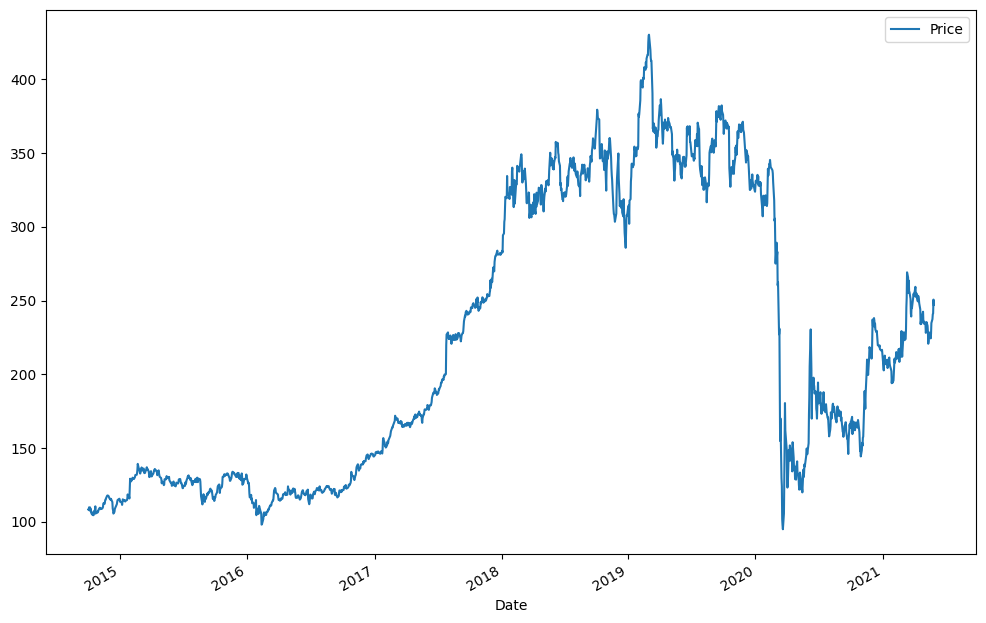

In [18]:
Boeing.Price.plot(figsize=(12,8))
plt.legend()
plt.show()

In [19]:
monthly = Boeing.Price.resample("M").last() ## resample to monthly (mont end)
monthly

<ipython-input-19-d47d08ece056>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = Boeing.Price.resample("M").last() ## resample to monthly (mont end)


,Price
Date,
2014-10-31,108.615372
2014-11-30,117.514305
2014-12-31,113.683441
2015-01-31,127.143898
2015-02-28,132.752853
...,...
2021-01-31,194.190002
2021-02-28,212.009995
2021-03-31,254.720001


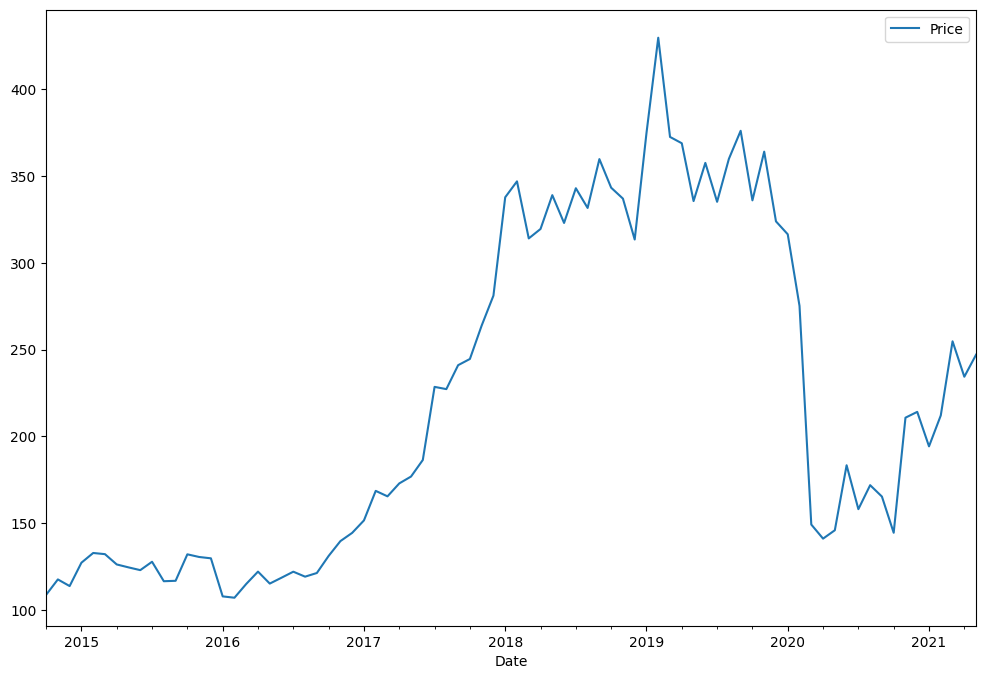

In [20]:
monthly.plot(figsize=(12,8))
plt.legend()
plt.show()

In [21]:
ann_mu = Boeing.log_ret.mean() * 252 # annualizes mean return
ann_mu

np.float64(0.12383178312680784)

In [22]:
ann_std = Boeing.log_ret.std() * np.sqrt(252) # annualizes std
ann_std

np.float64(0.4178214889957828)

In [23]:
window = 252 #rolling window 252 trading days ( ~1 year)

In [24]:
Boeing.log_ret.rolling(window=252)

Rolling [window=252,center=False,axis=0,method=single]

In [25]:
Boeing.log_ret.rolling(window=252) .sum() #Alt1

,log_ret
Date,
2014-10-01,NaN
2014-10-02,NaN
2014-10-03,NaN
2014-10-06,NaN
2014-10-07,NaN
...,...
2021-05-24,0.546073
2021-05-25,0.508848
2021-05-26,0.478901


In [26]:
rool_mean = Boeing.log_ret.rolling(window=252).mean() *252 # Alt 2
rool_mean

,log_ret
Date,
2014-10-01,NaN
2014-10-02,NaN
2014-10-03,NaN
2014-10-06,NaN
2014-10-07,NaN
...,...
2021-05-24,0.546073
2021-05-25,0.508848
2021-05-26,0.478901


In [27]:
rool_mean.iloc[250:]

,log_ret
Date,
2015-09-29,NaN
2015-09-30,NaN
2015-10-01,0.071277
2015-10-02,0.090115
2015-10-05,0.083586
...,...
2021-05-24,0.546073
2021-05-25,0.508848
2021-05-26,0.478901


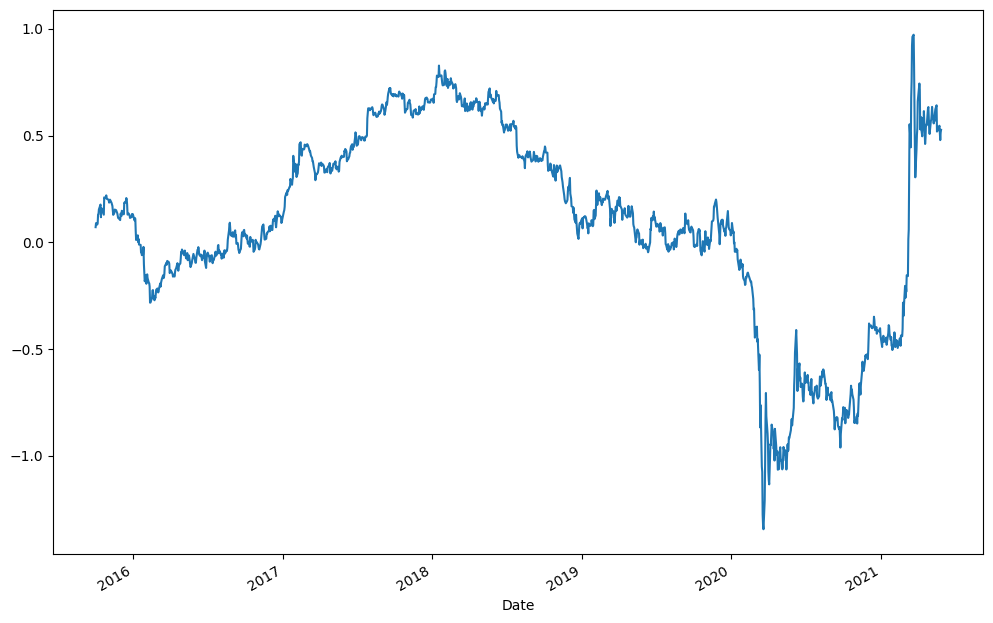

In [28]:
rool_mean.plot(figsize=(12,8))
plt.show()

In [29]:
roll_std = Boeing.log_ret.rolling(window=252).std() * np.sqrt(252)
roll_std

,log_ret
Date,
2014-10-01,NaN
2014-10-02,NaN
2014-10-03,NaN
2014-10-06,NaN
2014-10-07,NaN
...,...
2021-05-24,0.555865
2021-05-25,0.553822
2021-05-26,0.552973


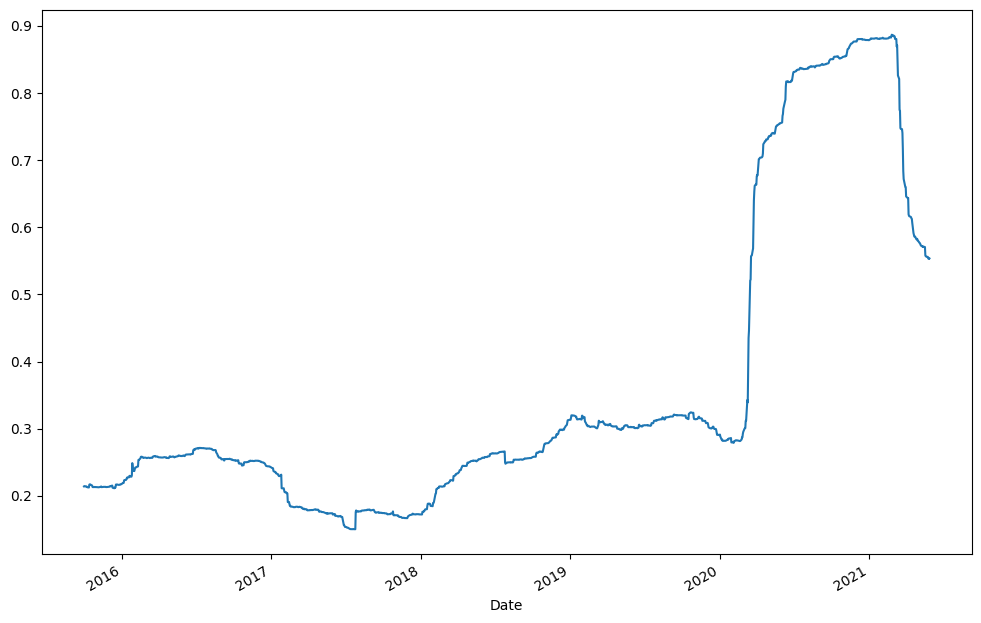

In [31]:
roll_std.plot(figsize=(12,8))
plt.show()

**Simple moving Average (Price) - SMA**

---



In [34]:
sma_window = 50

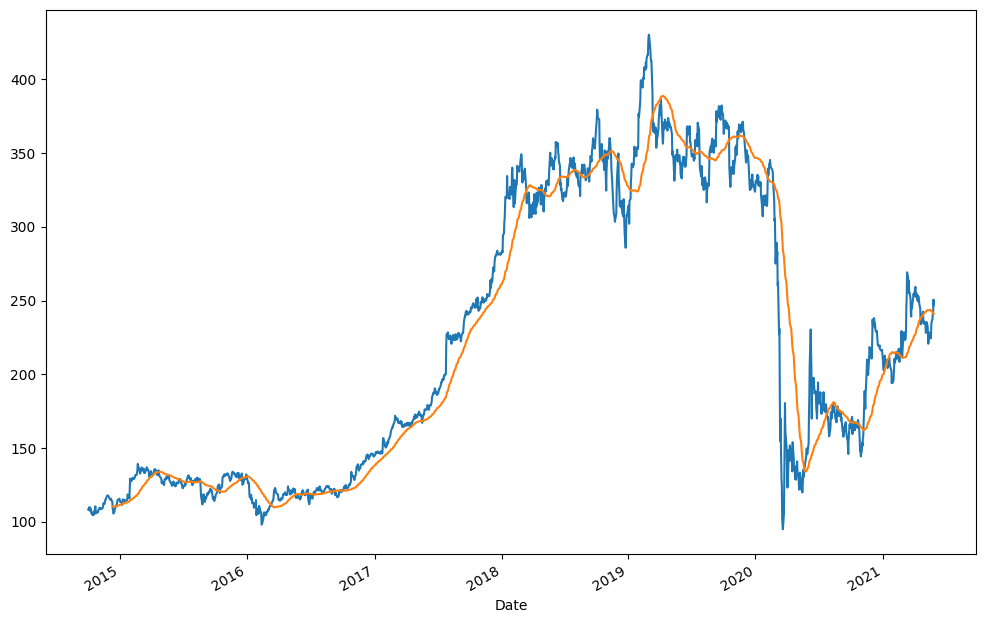

In [35]:
Boeing.Price.plot(figsize=(12,8))
Boeing.Price.rolling(sma_window).mean().plot()
plt.show()